# Ensemble Learning

Agenda:
    
    Ensemble learning
    
    What are the different types?
    
           Bagging
        
           Boosting
            
           Stacking

Random Forest - bagging technique

Introduce the Diabetes.csv for performing RF

Identify the best parameters using GridSearchCV

Build the best RF model

Important Features based on the model.

Conclude


## Accessing the data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db=pd.read_csv('diabetes.csv')
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Separating into target and features

In [4]:
y=db['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
X=db.drop(['Outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Standardisation

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Splitting the data to train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=100)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Building the model- Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

## Model performance

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(y_test,rfc.predict(X_test))
report=classification_report(y_test,rfc.predict(X_test))

print('CM:\n',cm)
print('Report:\n',report)

CM:
 [[85 16]
 [26 27]]
Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       101
           1       0.63      0.51      0.56        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



## Hyper parameter tuning using GridSearchCV 

In [10]:
from sklearn.model_selection import GridSearchCV

rfc_gs=GridSearchCV(rfc,{'n_estimators':range(75,125),
                        'criterion':['gini','entropy']})

In [11]:
rfc_gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(75, 125)})

## Best parameters

In [12]:
rfc_gs.best_params_

{'criterion': 'entropy', 'n_estimators': 122}

## Building a revised RF model

In [13]:
rfc_new=RandomForestClassifier(n_estimators=122, 
                               criterion='entropy',random_state=10)

In [14]:
rfc_new.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=122, random_state=10)

In [15]:
# Perfromance

cm=confusion_matrix(y_test,rfc_new.predict(X_test))
report=classification_report(y_test,rfc_new.predict(X_test))

print('CM:\n',cm)
print('Report:\n',report)

CM:
 [[84 17]
 [26 27]]
Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       101
           1       0.61      0.51      0.56        53

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



## Important features

In [16]:
rfc_new.feature_importances_

array([0.07865853, 0.26144447, 0.08867384, 0.06591887, 0.07007926,
       0.16953733, 0.12920921, 0.13647848])

In [17]:
# Creating a DF

df=pd.DataFrame({'Feature':X.columns,'Feature Imp':rfc_new.feature_importances_})
df

,Feature,Feature Imp
0,Pregnancies,0.078659
1,Glucose,0.261444
2,BloodPressure,0.088674
3,SkinThickness,0.065919
4,Insulin,0.070079
5,BMI,0.169537
6,DiabetesPedigreeFunction,0.129209
7,Age,0.136478


In [20]:
df=df.sort_values(['Feature Imp'],ascending=False)
df

,Feature,Feature Imp
1,Glucose,0.261444
5,BMI,0.169537
7,Age,0.136478
6,DiabetesPedigreeFunction,0.129209
2,BloodPressure,0.088674
0,Pregnancies,0.078659
4,Insulin,0.070079
3,SkinThickness,0.065919


In [21]:
# Adding one column

df['Feature Imp Cum']=df['Feature Imp'].cumsum()
df

,Feature,Feature Imp,Feature Imp Cum
1,Glucose,0.261444,0.261444
5,BMI,0.169537,0.430982
7,Age,0.136478,0.567460
6,DiabetesPedigreeFunction,0.129209,0.696669
2,BloodPressure,0.088674,0.785343
0,Pregnancies,0.078659,0.864002
4,Insulin,0.070079,0.934081
3,SkinThickness,0.065919,1.000000


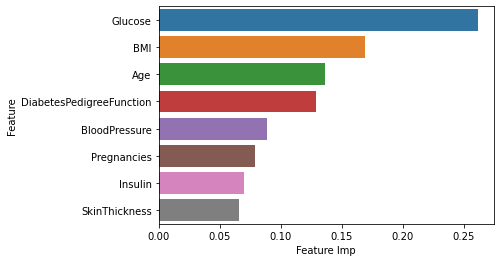

In [22]:
sns.barplot(x=df['Feature Imp'],y=df['Feature'],data=df);